In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.regression.quantile_regression as Q_reg
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
housing_data = pd.read_csv("/content/drive/MyDrive/housing.csv")
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


About Dataset:

**longitude:** A measure of how far west a house is; a higher value is farther west

**latitude:** A measure of how far north a house is; a higher value is farther north

**housingMedianAge:** Median age of a house within a block; a lower number is a newer building

**totalRooms:** Total number of rooms within a block

**totalBedrooms:** Total number of bedrooms within a block

**population:** Total number of people residing within a block

**households:** Total number of households, a group of people residing within a home unit, for a block

**medianIncome:** Median income for households within a block of houses (measured in tens of thousands of US Dollars)

**medianHouseValue:** Median house value for households within a block (measured in US Dollars)

**oceanProximity:** Location of the house w.r.t ocean/sea

In [ ]:
housing_data.shape

(20640, 10)

In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are total 20,640 instance in the dataset  

total_bedrooms has 20,433 only, the rest 207 is null values

ocean_proximity is categorical variable

**Missing Values**

In [ ]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Statistical Information**

In [ ]:
housing_data.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


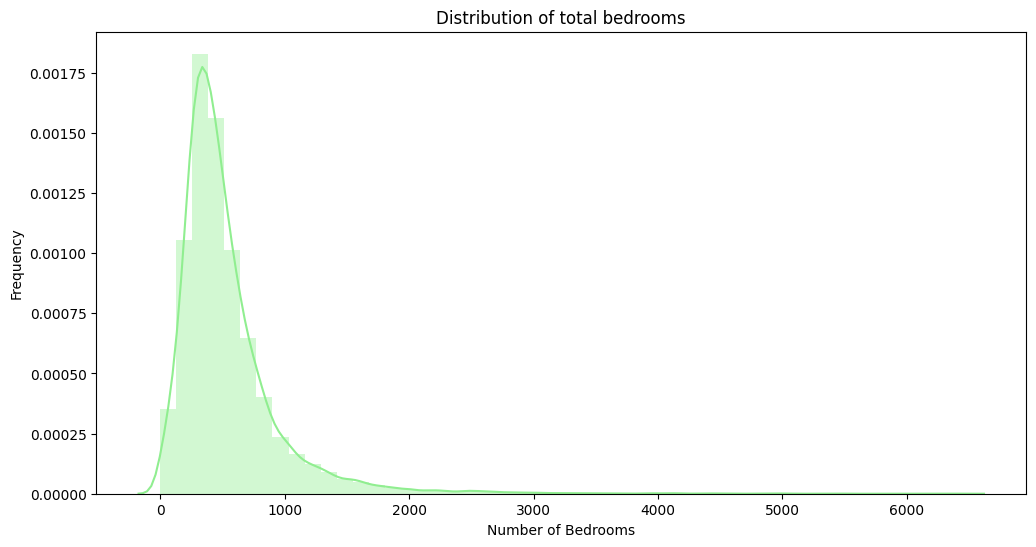

In [ ]:
plt.figure(figsize = (12,6))
sns.distplot(x = housing_data['total_bedrooms'], color = 'lightgreen')
plt.title('Distribution of total bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

total_bedrooms is positively skewed, thus we will use the median to fill null values because it works best for skewed distributions and the mean is sensitive to data skewness.

In [ ]:
housing_data['total_bedrooms'].fillna(value = housing_data['total_bedrooms'].median(), inplace = True)

In [ ]:
housing_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

No more null values in total_bedrooms.

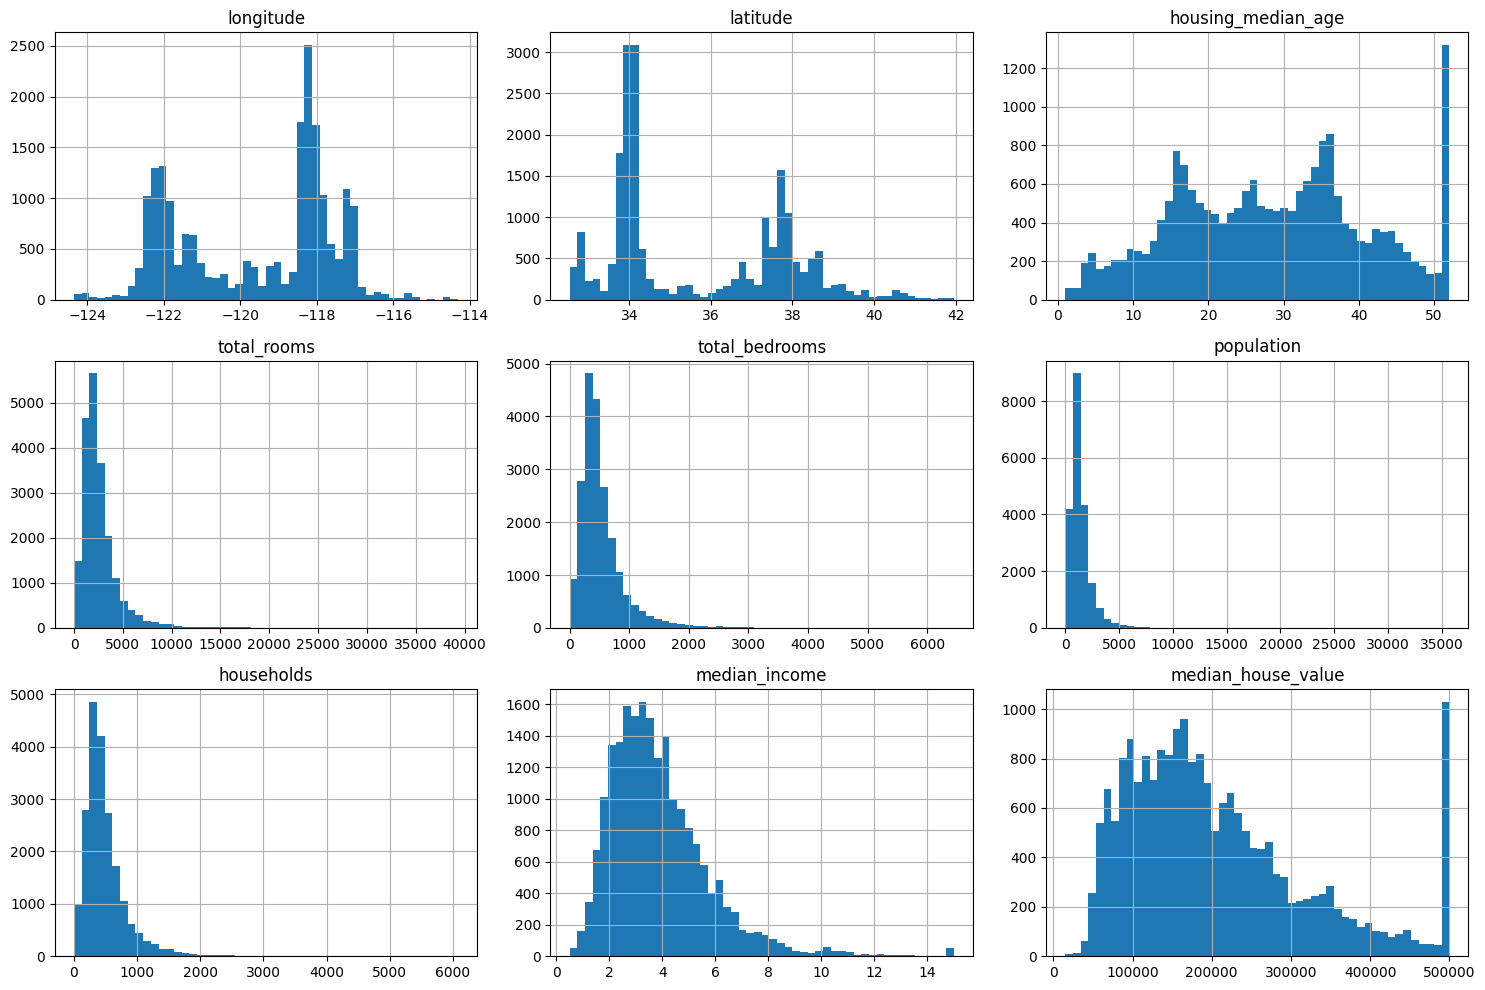

In [ ]:
housing_data.hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

The median age of houses is mostly between 15 to 37 years.

**Distribution of Median Income**

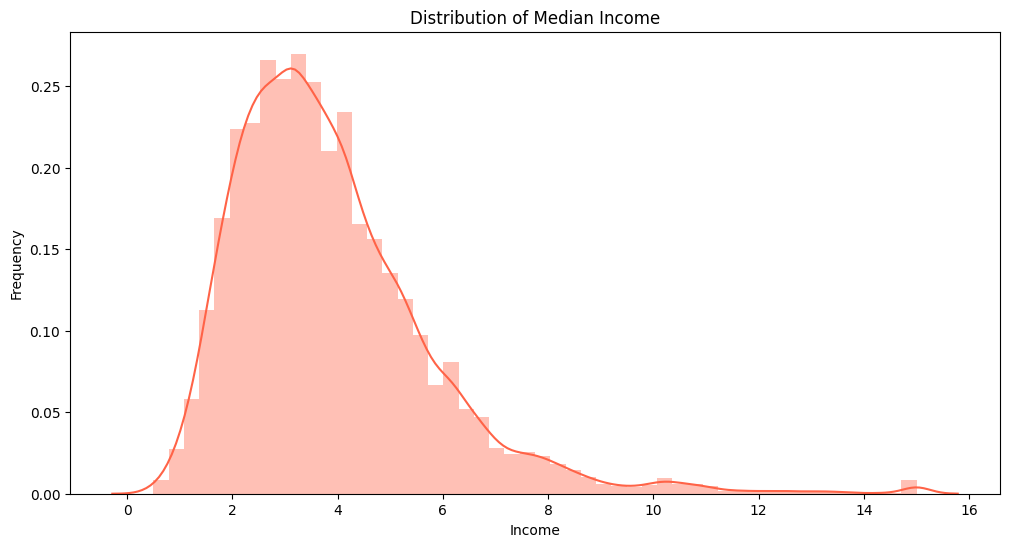

In [ ]:
plt.figure(figsize = (12,6))
sns.distplot(x = housing_data['median_income'], color = 'tomato')
plt.title('Distribution of Median Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

It's a positively skewed distribution. The plot demonstrates that the majority of people have income within the same range, with only a few who are on the further side.

**Categorical Variable: Ocean Proximity**

Text(0.5, 1.0, 'Ocean Proximity Bar Plot')

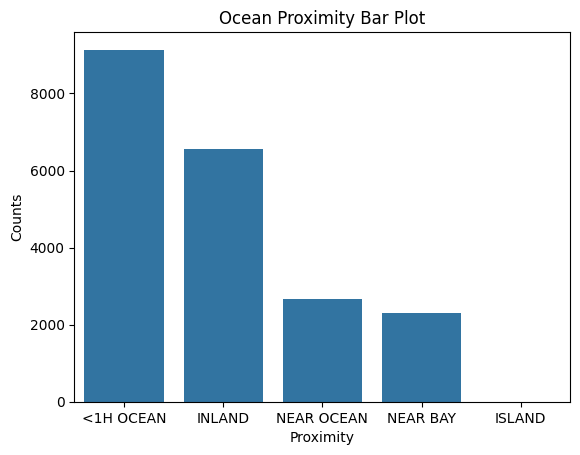

In [ ]:
ocean_proximity = housing_data['ocean_proximity'].value_counts()
sns.barplot(x=ocean_proximity.index, y=ocean_proximity.values)

plt.xlabel('Proximity')
plt.ylabel('Counts')
plt.title('Ocean Proximity Bar Plot')

Five unique values are present in ocean_proximity variable.

**Plotting Median house value vs Median Income**

Text(0.5, 0, 'Median Income')

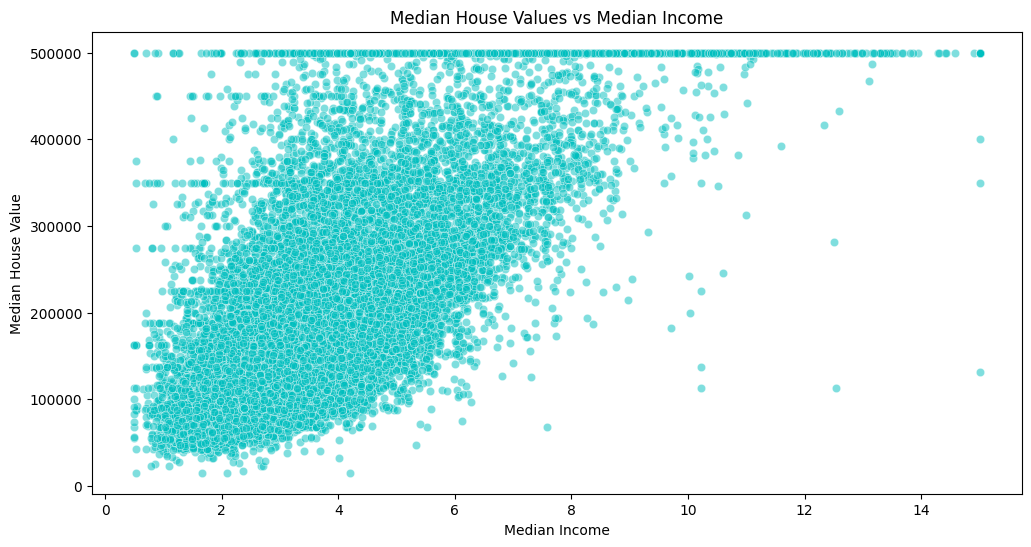

In [ ]:
plt.figure(figsize = (12,6))
plt.title("Median House Values vs Median Income")
sns.scatterplot(data = housing_data, y = 'median_house_value', x = 'median_income', alpha = 0.5, color = 'c')
plt.ylabel("Median House Value")
plt.xlabel("Median Income")

We can see that the maximum house value was clearly fixed at $500,000, and any houses more expensive than that received this sum. These records should be removed because they contain an incorrect target value and could affect the algorithm.

There are horizontal lines at specific positions, including 450000, 350000, and 275000. It looks very unnatural, and these values were probably misplaced.

**Removing horizontal lines at specific positions**

In [ ]:
data = housing_data[~housing_data['median_house_value'].isin([450000, 350000, 275000, 500000, 500001])].reset_index(drop=True)

Text(0.5, 0, 'Median Income')

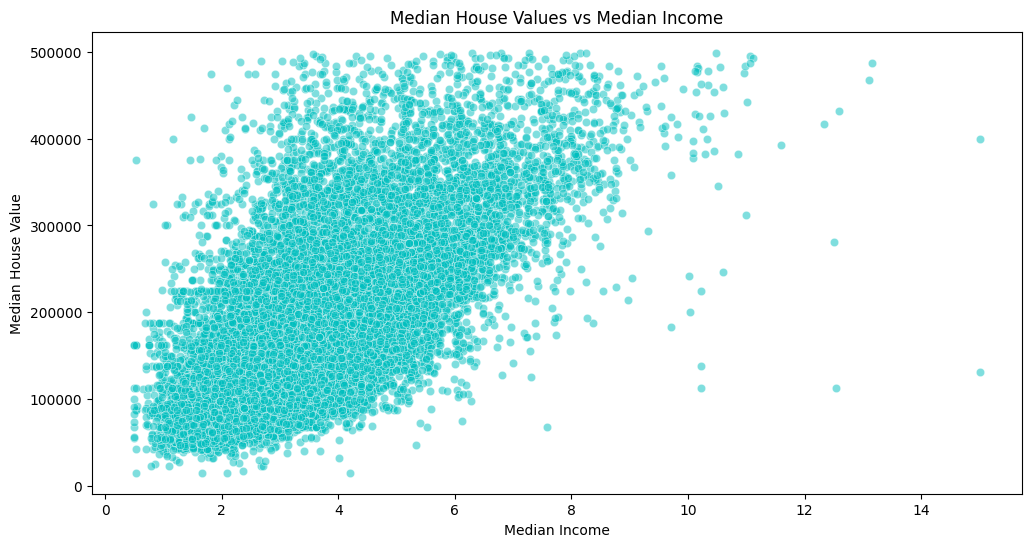

In [ ]:
plt.figure(figsize = (12,6))
plt.title("Median House Values vs Median Income")
sns.scatterplot(data = data, y = 'median_house_value', x = 'median_income', alpha = 0.5, color = 'c')
plt.ylabel("Median House Value")
plt.xlabel("Median Income")

**Correlation Matrix and Heatmap**

In [ ]:
housing_data2=housing_data.iloc[:,:-1]

<Axes: >

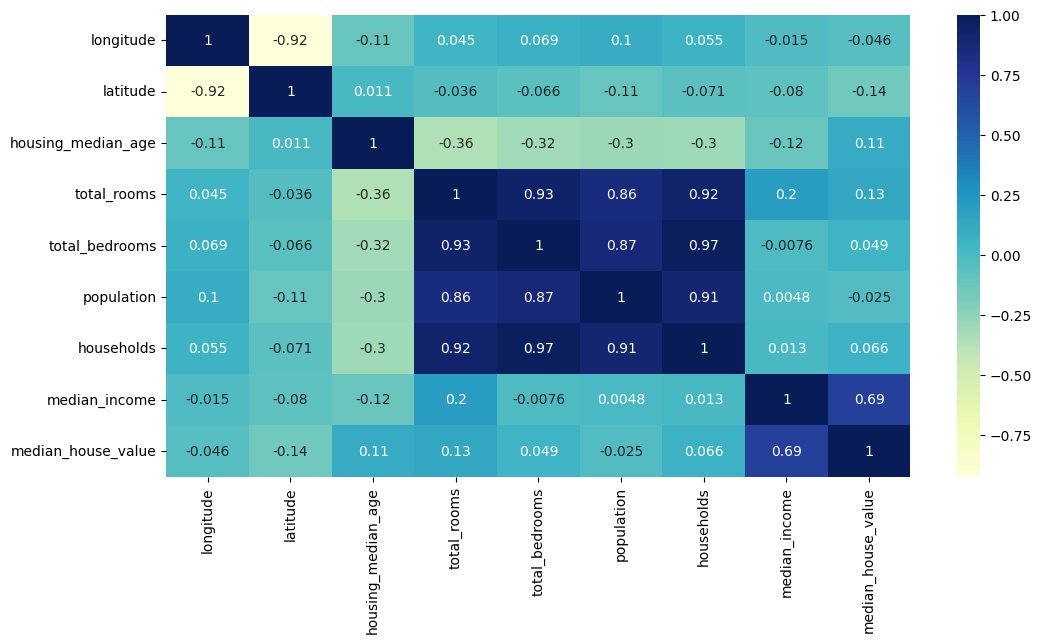

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(housing_data2.corr(), annot=True, cmap="YlGnBu")

**Ocean Proximity vs Median house value**

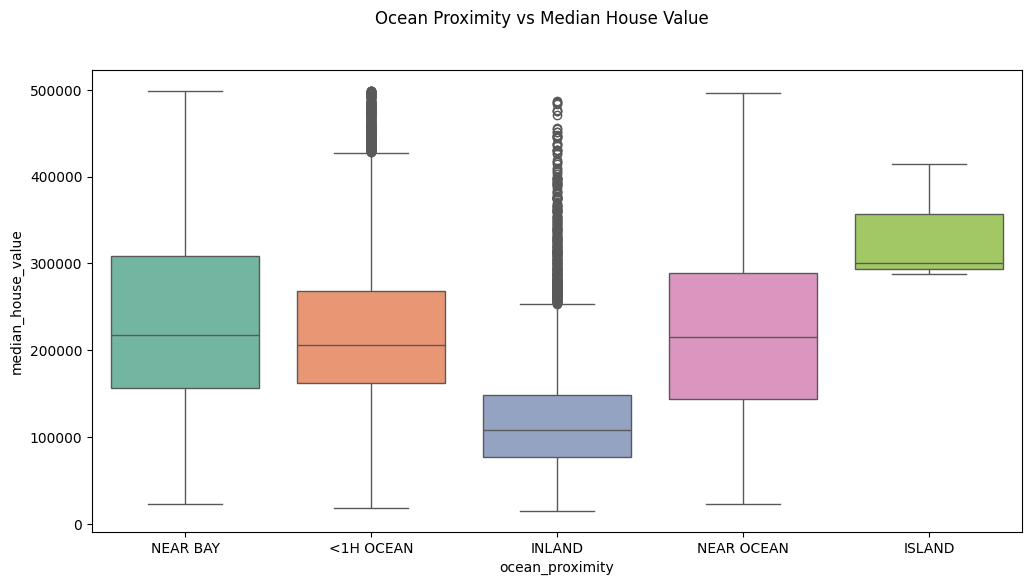

In [ ]:
plt.figure(figsize = (12,6))

plt.suptitle('Ocean Proximity vs Median House Value')
sns.boxplot(data=data, x="ocean_proximity", y="median_house_value", palette="Set2")

plt.show()

Houses in the "near_bay", "near_ocean", and "<1H ocean" categories are more expensive than those in the inland. Furthermore, these categories have a wider range of prices.

**Extracting useful features from the present variables**

In [ ]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_household"] = data["total_bedrooms"]/data["households"]
data["population_per_household"] = data["population"]/data["households"]

In [ ]:
data[['rooms_per_household', 'bedrooms_per_household', 'population_per_household']].describe()

,rooms_per_household,bedrooms_per_household,population_per_household
count,19467.000000,19467.000000,19467.000000
mean,5.369148,1.100794,3.075856
std,2.294042,0.503145,10.070866
min,0.846154,0.121204,0.692308
25%,4.426481,1.005256,2.451096
50%,5.191993,1.048421,2.840741
75%,5.973212,1.099665,3.307692
max,132.533333,34.066667,1243.333333


In [ ]:
data = data.drop(['total_rooms','total_bedrooms','population', 'households'], axis = 1)
data.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


As the 'ISLAND' in ocean proximity has little instances, we are dropping it from dataset.

In [ ]:
data = data.loc[data['ocean_proximity'] != 'ISLAND'].reset_index(drop=True)

In [ ]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8505
INLAND        6511
NEAR OCEAN    2406
NEAR BAY      2042
Name: count, dtype: int64

**Encoding Categorical Variable - Ocean Proximity**

In [ ]:
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(data[['ocean_proximity']]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['ocean_proximity']))

df = data.join(encoded_df)
df.reset_index(drop=True, inplace=True)

In [ ]:
df = df.drop(['ocean_proximity'], axis = 1)

In [ ]:
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,8.3252,452600.0,6.984127,1.023810,2.555556,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,8.3014,358500.0,6.238137,0.971880,2.109842,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,7.2574,352100.0,8.288136,1.073446,2.802260,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,5.6431,341300.0,5.817352,1.073059,2.547945,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,3.8462,342200.0,6.281853,1.081081,2.181467,0.0,0.0,1.0,0.0


<Axes: >

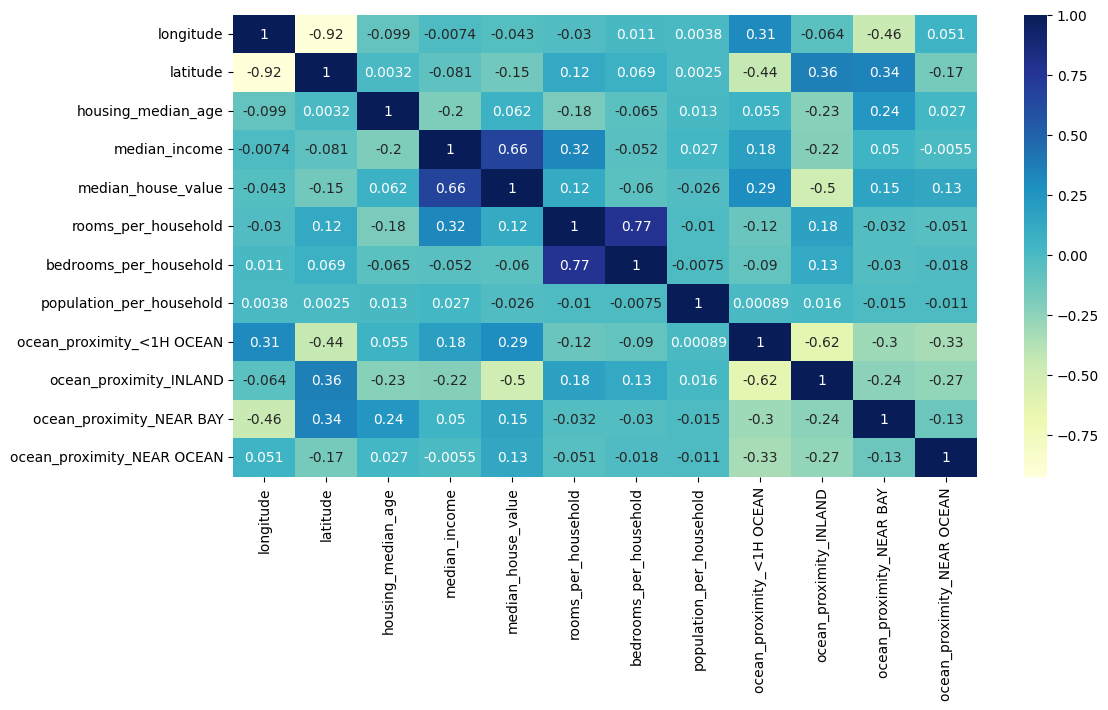

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

Data is ready to be split into train and test to train our models.

**Splitting Data**

In [ ]:
X = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]

In [ ]:
X.columns = [str(col).replace('[', '').replace(']', '').replace('<', '') for col in X.columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
continuous_features = ['longitude', 'latitude', 'housing_median_age', 'median_income', 'rooms_per_household',	'bedrooms_per_household',	'population_per_household']

**Scaling Data**

In [ ]:
scaler = StandardScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

In [ ]:
print("X_train shape is ",X_train.shape)
print("X_test shape is ",X_test.shape)
print("y_train shape is ",y_train.shape)
print("y_test shape is ",y_test.shape)

X_train shape is  (14598, 11)
X_test shape is  (4866, 11)
y_train shape is  (14598,)
y_test shape is  (4866,)


**Quantile Regression**

In [ ]:
quantiles = [0.01, 0.1, 0.5, 0.95, 0.99]

In [ ]:
def Qreg(q):
    qr_model = Q_reg.QuantReg(y_train, X_train).fit(q=q)

    coefs = pd.DataFrame()
    coefs['param'] = qr_model.params
    coefs = pd.concat([coefs,qr_model.conf_int()],axis=1)
    coefs['q'] = q
    coefs.columns = ['beta','beta_lower','beta_upper','quantile']

    pred = pd.Series(qr_model.predict(X_test).round(2))
    return coefs, pred

In [ ]:
qr_coefs = pd.DataFrame()
qr_actual_prediction = pd.DataFrame()

for q in quantiles:
    coefs, pred = Qreg(q)
    qr_coefs = pd.concat([qr_coefs,coefs])
    qr_actual_prediction = pd.concat([qr_actual_prediction,pred],axis=1)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


In [ ]:
qr_actual_prediction.columns=quantiles
qr_actual_prediction['actual'] = y_test
qr_actual_prediction['interval'] = qr_actual_prediction[0.99] - qr_actual_prediction[0.01]
qr_actual_prediction = qr_actual_prediction.sort_values('interval').reset_index(drop=True)
qr_actual_prediction

,0.01,0.1,0.5,0.95,0.99,actual,interval
0,12651.57,6925.11,9130.42,59328.59,47367.48,56100.0,34715.91
1,25938.26,24973.63,31986.05,82188.49,71844.39,52600.0,45906.13
2,15545.12,7884.44,-1041.61,44970.54,84468.68,86800.0,68923.56
3,23903.88,25369.46,35653.17,78998.51,94941.23,61800.0,71037.35
4,16570.20,19325.76,32223.85,100068.47,100905.84,44000.0,84335.64
...,...,...,...,...,...,...,...
4861,67295.07,73575.93,214011.98,539521.29,736652.98,221400.0,669357.91
4862,16365.46,150563.19,345907.13,659448.46,701894.64,94800.0,685529.18
4863,-17361.90,66003.66,264109.22,619773.81,741798.44,67500.0,759160.34
4864,28194.95,26201.79,178134.71,583255.89,831994.35,87500.0,803799.40


In [ ]:
quantile = 0.5

def Qreg(q, X_train, y_train, X_test):
    qr_mod = Q_reg.QuantReg(y_train, X_train).fit(q=q)
    prediction = pd.Series(qr_mod.predict(X_test).round(2))
    return prediction

qr_pred = Qreg(quantile, X_train, y_train, X_test)

In [ ]:
print(f'\nQuantile Regression R² score is {metrics.r2_score(y_test, qr_pred)}')

print(f'\nQuantile Regression Mean Absolute Error is {round(metrics.mean_absolute_error(y_test, qr_pred), 2)}')

print(f'\nQuantile Regression Mean Squared Error is {round(metrics.mean_squared_error(y_test, qr_pred), 2)}')

print(f'\nQuantile Regression Root Mean Squared Error is {round(np.sqrt(metrics.mean_squared_error(y_test, qr_pred)), 2)}')


Quantile Regression R² score is 0.5671770156918146

Quantile Regression Mean Absolute Error is 44393.51

Quantile Regression Mean Squared Error is 4132679000.65

Quantile Regression Root Mean Squared Error is 64285.92


**Linear Regression**

In [ ]:
li_model = LinearRegression()

In [ ]:
li_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
li_pred = li_model.predict(X_test)

In [ ]:
print(f'\nLinear Regression R² score is {metrics.r2_score(y_test, li_pred)}')

print(f'\nLinear Regression Mean Absolute Error is {round(metrics.mean_absolute_error(y_test, li_pred), 2)}')

print(f'\nLinear Regression Mean Squared Error is {round(metrics.mean_squared_error(y_test, li_pred), 2)}')

print(f'\nLinear Regression Root Mean Squared Error is {round(np.sqrt(metrics.mean_squared_error(y_test, li_pred)), 2)}')


Linear Regression R² score is 0.5874051352935113

Linear Regression Mean Absolute Error is 46017.68

Linear Regression Mean Squared Error is 3939536935.34

Linear Regression Root Mean Squared Error is 62765.73


**Decision Tree Regression**

In [ ]:
dt_model = DecisionTreeRegressor()

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
dt_pred = dt_model.predict(X_test)

In [ ]:
print(f'\nDecision Tree Regression R² score is {metrics.r2_score(y_test, dt_pred)}')

print(f'\nDecision Tree Regression Mean Absolute Error is {round(metrics.mean_absolute_error(y_test, dt_pred), 2)}')

print(f'\nDecision Tree Regression Mean Squared Error is {round(metrics.mean_squared_error(y_test, dt_pred), 2)}')

print(f'\nDecision Tree Regression Root Mean Squared Error is {round(np.sqrt(metrics.mean_squared_error(y_test, dt_pred)), 2)}')


Decision Tree Regression R² score is 0.5796285184729684

Decision Tree Regression Mean Absolute Error is 41776.59

Decision Tree Regression Mean Squared Error is 4013789602.59

Decision Tree Regression Root Mean Squared Error is 63354.48


**Random Forest Regression**

In [ ]:
rf_model = RandomForestRegressor()

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf_pred = rf_model.predict(X_test)

In [ ]:
print(f'\nRandom Forest Regression R² score is {metrics.r2_score(y_test, rf_pred)}')

print(f'\nRandom Forest Regression Mean Absolute Error is {round(metrics.mean_absolute_error(y_test, rf_pred), 2)}')

print(f'\nRandom Forest Regression Mean Squared Error is {round(metrics.mean_squared_error(y_test, rf_pred), 2)}')

print(f'\nRandom Forest Regression Root Mean Squared Error is {round(np.sqrt(metrics.mean_squared_error(y_test, rf_pred)), 2)}')


Random Forest Regression R² score is 0.8043493845045451

Random Forest Regression Mean Absolute Error is 29278.51

Random Forest Regression Mean Squared Error is 1868110565.83

Random Forest Regression Root Mean Squared Error is 43221.64


**XGBoost**

In [ ]:
xgb_model = XGBRegressor()

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_pred = xgb_model.predict(X_test)

In [ ]:
print(f'\nXGBoost R² score is {metrics.r2_score(y_test, xgb_pred)}')

print(f'\nXGBoost Mean Absolute Error is {round(metrics.mean_absolute_error(y_test, xgb_pred), 2)}')

print(f'\nXGBoost Mean Squared Error is {round(metrics.mean_squared_error(y_test, xgb_pred), 2)}')

print(f'\nXGBoost Root Mean Squared Error is {round(np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)), 2)}')


XGBoost R² score is 0.8277858710207918

XGBoost Mean Absolute Error is 27622.86

XGBoost Mean Squared Error is 1644334382.07

XGBoost Root Mean Squared Error is 40550.39


From the models above, Random Forest and XGBoost are performing well on housing dataset. We will fine tune these two models.

**Fine Tuning Models**



1.   Random Forest



In [ ]:
random_forest_model = RandomForestRegressor()

param_random = {
    'n_estimators': [15, 30, 50],
    'max_features': [4, 8, 12, 16]
}

grid_search_random = GridSearchCV(estimator = random_forest_model, param_grid = param_random, cv=5, scoring='neg_mean_squared_error')
grid_search_random.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [4, 8, 12, 16],
                         'n_estimators': [15, 30, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
best_random_model = grid_search_random.best_estimator_
best_random_model

RandomForestRegressor(max_features=4, n_estimators=50)

In [ ]:
random_forest =  RandomForestRegressor(n_estimators=50, max_features=4)

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_features=4, n_estimators=50)

In [ ]:
random_forest_pred = random_forest.predict(X_test)

In [ ]:
print(f'\nRandom Forest (Tuned) R² score is {metrics.r2_score(y_test, random_forest_pred)}')

print(f'\nRandom Forest (Tuned) Mean Absolute Error is {round(metrics.mean_absolute_error(y_test, random_forest_pred), 2)}')

print(f'\nRandom Forest (Tuned) Mean Squared Error is {round(metrics.mean_squared_error(y_test, random_forest_pred), 2)}')

print(f'\nRandom Forest (Tuned) Root Mean Squared Error is {round(np.sqrt(metrics.mean_squared_error(y_test, random_forest_pred)), 2)}')


Random Forest (Tuned) R² score is 0.8154536219009345

Random Forest (Tuned) Mean Absolute Error is 28546.79

Random Forest (Tuned) Mean Squared Error is 1762085122.71

Random Forest (Tuned) Root Mean Squared Error is 41977.2




2.   XGBoost



In [ ]:
xgboost_model = XGBRegressor()

param_xgboost = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_xgboost = GridSearchCV(estimator = xgboost_model, param_grid = param_xgboost, cv = 5, scoring = 'neg_mean_squared_error')
grid_search_xgboost.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
best_xgboost_model = grid_search_xgboost.best_estimator_
best_xgboost_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgboost = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.2)

In [ ]:
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgboost_pred = xgboost.predict(X_test)

In [ ]:
print(f'\nXGBoost (Tuned) R² score is {metrics.r2_score(y_test, xgboost_pred)}')

print(f'\nXGBoost (Tuned) Mean Absolute Error is {round(metrics.mean_absolute_error(y_test, xgboost_pred), 2)}')

print(f'\nXGBoost (Tuned) Mean Squared Error is {round(metrics.mean_squared_error(y_test, xgboost_pred), 2)}')

print(f'\nXGBoost (Tuned) Root Mean Squared Error is {round(np.sqrt(metrics.mean_squared_error(y_test, xgboost_pred)), 2)}')


XGBoost (Tuned) R² score is 0.8330668133737495

XGBoost (Tuned) Mean Absolute Error is 27123.84

XGBoost (Tuned) Mean Squared Error is 1593910905.6

XGBoost (Tuned) Root Mean Squared Error is 39923.81


**Evaluation Metrics DataFrame**

In [ ]:
evaluation_metrics = pd.DataFrame({
    'Model': [
        'Quantile Regression',
        'Linear Regression',
        'Decision Tree Regression',
        'Random Forest Regression',
        'XGBoost',
        'Random Forest Regression (Tuned)',
        'XGBoost (Tuned)'
    ],
    'Mean Absolute Error': [
        round(metrics.mean_absolute_error(y_test, qr_pred), 2),
        round(metrics.mean_absolute_error(y_test, li_pred), 2),
        round(metrics.mean_absolute_error(y_test, dt_pred), 2),
        round(metrics.mean_absolute_error(y_test, rf_pred), 2),
        round(metrics.mean_absolute_error(y_test, xgb_pred), 2),
        round(metrics.mean_absolute_error(y_test, random_forest_pred), 2),
        round(metrics.mean_absolute_error(y_test, xgboost_pred), 2)
    ],
    'Mean Squared Error': [
        round(metrics.mean_squared_error(y_test, qr_pred), 2),
        round(metrics.mean_squared_error(y_test, li_pred), 2),
        round(metrics.mean_squared_error(y_test, dt_pred), 2),
        round(metrics.mean_squared_error(y_test, rf_pred), 2),
        round(metrics.mean_squared_error(y_test, xgb_pred), 2),
        round(metrics.mean_squared_error(y_test, random_forest_pred), 2),
        round(metrics.mean_squared_error(y_test, xgboost_pred), 2)
    ],
    'Root Mean Squared Error': [
        round(np.sqrt(metrics.mean_squared_error(y_test, qr_pred)), 2),
        round(np.sqrt(metrics.mean_squared_error(y_test, li_pred)), 2),
        round(np.sqrt(metrics.mean_squared_error(y_test, dt_pred)), 2),
        round(np.sqrt(metrics.mean_squared_error(y_test, rf_pred)), 2),
        round(np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)), 2),
        round(np.sqrt(metrics.mean_squared_error(y_test, random_forest_pred)), 2),
        round(np.sqrt(metrics.mean_squared_error(y_test, xgboost_pred)), 2)
    ],
    'R2 Score': [
        metrics.r2_score(y_test, qr_pred),
        metrics.r2_score(y_test, li_pred),
        metrics.r2_score(y_test, dt_pred),
        metrics.r2_score(y_test, rf_pred),
        metrics.r2_score(y_test, xgb_pred),
        metrics.r2_score(y_test, random_forest_pred),
        metrics.r2_score(y_test, xgboost_pred)
    ]
})

In [ ]:
evaluation_metrics

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,Quantile Regression,44393.51,4.132679e+09,64285.92,0.567177
1,Linear Regression,46017.68,3.939537e+09,62765.73,0.587405
2,Decision Tree Regression,41776.59,4.013790e+09,63354.48,0.579629
3,Random Forest Regression,29278.51,1.868111e+09,43221.64,0.804349
4,XGBoost,27622.86,1.644334e+09,40550.39,0.827786
5,Random Forest Regression (Tuned),28546.79,1.762085e+09,41977.20,0.815454
6,XGBoost (Tuned),27123.84,1.593911e+09,39923.81,0.833067


**Model's R2 score**

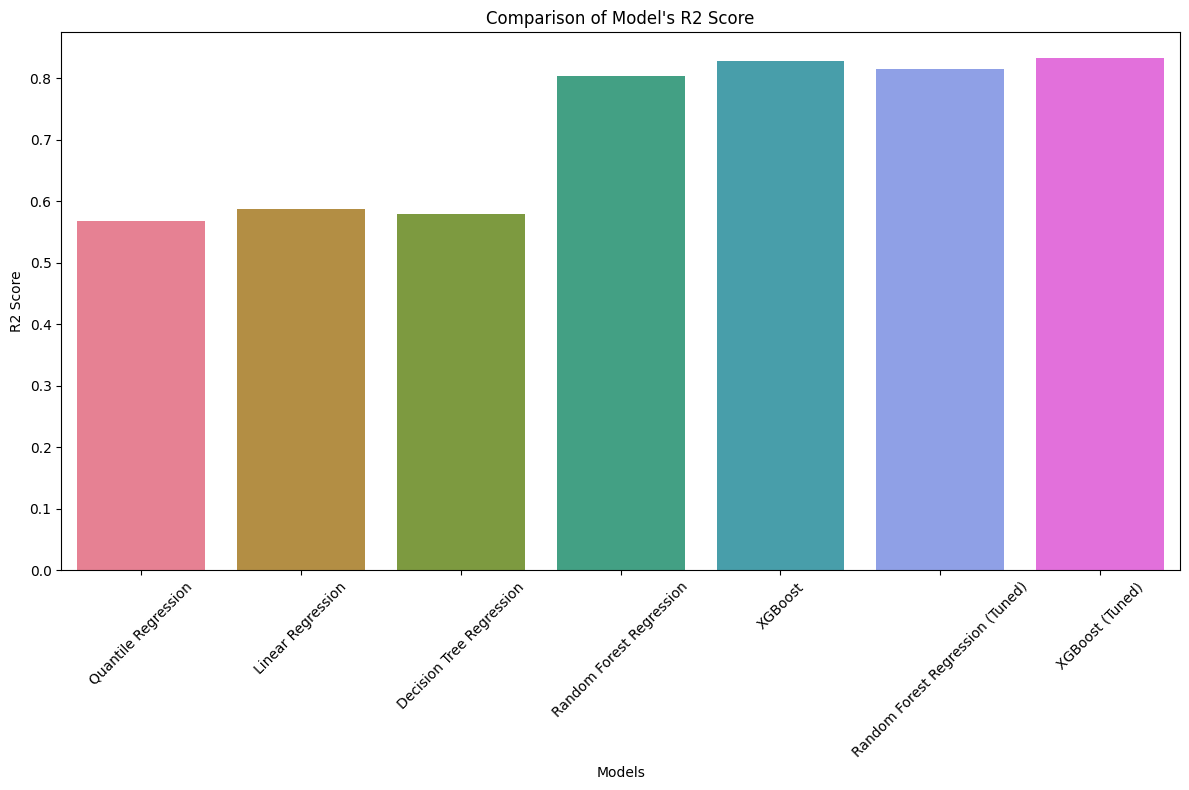

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=evaluation_metrics['Model'], y=evaluation_metrics['R2 Score'], palette='husl')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title("Comparison of Model's R2 Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

XGBoost (tuned) has the highest R2 score and has the least mean absolute error which shows that model is performing well on the test data.

**Predicted vs Actual Median House Values using XGBoost (Tuned)**

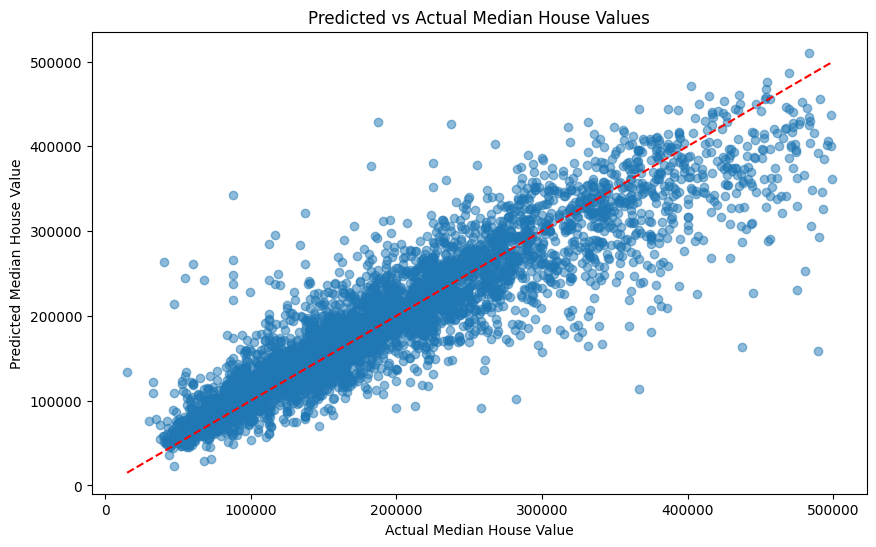

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgboost_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Predicted vs Actual Median House Values')
plt.show()